In [1]:
import pandas as pd
import numpy as np
import datetime
import re
from dateutil.parser import parse
import glob
import sys
import openpyxl as opx
import xlrd

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed,GRU, Conv1D

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# KPEB1 데이터 추출

In [113]:
df_kpeb1 = pd.read_csv('./211215/211215 kpeb-1.csv', parse_dates = True)

In [114]:
df_kpeb1['DateTime']= pd.to_datetime(df_kpeb1['DateTime'])

In [115]:
df_kpeb1=df_kpeb1[(df_kpeb1['DateTime']>='2021-09-13 00:00:00')]

In [116]:
df_kpeb1=df_kpeb1[(df_kpeb1['DateTime']<'2021-12-15 00:00:00')]

In [117]:
df_kpeb1=df_kpeb1.set_index('DateTime')

In [118]:
df_kpeb1=df_kpeb1.resample('1T').mean()

In [119]:
df_kpeb1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133920 entries, 2021-09-13 00:00:00 to 2021-12-14 23:59:00
Freq: T
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeatPump(W)           118238 non-null  float64
 1   Total_Consumption(W)  118238 non-null  float64
 2   Total_Production(W)   118238 non-null  float64
 3   Pv1_Supply(W)         118238 non-null  float64
 4   Pv2_Supply(W)         118238 non-null  float64
dtypes: float64(5)
memory usage: 6.1 MB


In [120]:
df_kpeb1=df_kpeb1.fillna(0)

In [121]:
df_kpeb1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133920 entries, 2021-09-13 00:00:00 to 2021-12-14 23:59:00
Freq: T
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeatPump(W)           133920 non-null  float64
 1   Total_Consumption(W)  133920 non-null  float64
 2   Total_Production(W)   133920 non-null  float64
 3   Pv1_Supply(W)         133920 non-null  float64
 4   Pv2_Supply(W)         133920 non-null  float64
dtypes: float64(5)
memory usage: 6.1 MB


In [122]:
df_kpeb1

,HeatPump(W),Total_Consumption(W),Total_Production(W),Pv1_Supply(W),Pv2_Supply(W)
DateTime,,,,,
2021-09-13 00:00:00,111.0,5695.0,0.0,0.0,0.0
2021-09-13 00:01:00,111.0,5284.0,0.0,0.0,0.0
2021-09-13 00:02:00,0.0,0.0,0.0,0.0,0.0
2021-09-13 00:03:00,110.0,5551.0,0.0,0.0,0.0
2021-09-13 00:04:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-12-14 23:55:00,202.0,7606.0,0.0,0.0,0.0
2021-12-14 23:56:00,200.0,7527.0,0.0,0.0,0.0
2021-12-14 23:57:00,201.0,7163.0,0.0,0.0,0.0


# KPEB2 데이터 추출

In [123]:
df_kpeb2 = pd.read_csv('./211215/211215 kpeb-2.csv', parse_dates = True)

In [124]:
df_kpeb2['DateTime']= pd.to_datetime(df_kpeb2['DateTime'])

In [125]:
df_kpeb2=df_kpeb2[(df_kpeb2['DateTime']>='2021-09-13 00:00:00')]

In [126]:
df_kpeb2=df_kpeb2[(df_kpeb2['DateTime']<'2021-12-15 00:00:00')]

In [127]:
df_kpeb2=df_kpeb2.set_index('DateTime')

In [128]:
df_kpeb2=df_kpeb2.resample('1T').mean()

In [129]:
df_kpeb2=df_kpeb2.fillna(0)

In [130]:
df_kpeb2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133919 entries, 2021-09-13 00:01:00 to 2021-12-14 23:59:00
Freq: T
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Total_Consumption(W)  133919 non-null  float64
 1   Total_Production(W)   133919 non-null  float64
 2   Pvt_Supply(W)         133919 non-null  float64
 3   Pv1_Supply(W)         133919 non-null  float64
 4   Pv2_Supply(W)         133919 non-null  float64
dtypes: float64(5)
memory usage: 6.1 MB


In [131]:
df_kpeb2

,Total_Consumption(W),Total_Production(W),Pvt_Supply(W),Pv1_Supply(W),Pv2_Supply(W)
DateTime,,,,,
2021-09-13 00:01:00,25.0,0.0,0.0,0.0,0.0
2021-09-13 00:02:00,0.0,0.0,0.0,0.0,0.0
2021-09-13 00:03:00,25.0,0.0,0.0,0.0,0.0
2021-09-13 00:04:00,25.0,0.0,0.0,0.0,0.0
2021-09-13 00:05:00,24.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...
2021-12-14 23:55:00,124.0,0.0,-66.0,0.0,0.0
2021-12-14 23:56:00,124.0,0.0,-66.0,0.0,0.0
2021-12-14 23:57:00,123.0,0.0,-66.0,0.0,0.0


# KPEB합치기

In [340]:
df_kpeb = pd.DataFrame()
df_kpeb = pd.DataFrame(pd.date_range('2021-09-13 00:00:00', '2021-11-03 23:59:00', freq='T'), columns=['Time'])

In [341]:
df_kpeb = df_kpeb.set_index('Time')

In [342]:
df_kpeb['Cons_kpeb(W)'] = df_kpeb1['Total_Consumption(W)']+df_kpeb2['Total_Consumption(W)']
df_kpeb['Prod_kpeb(W)'] = df_kpeb1['Total_Production(W)']+df_kpeb2['Total_Production(W)']

In [343]:
df_kpeb['Cons_acc_kpeb(Wh)'] = df_kpeb['Cons_kpeb(W)'].cumsum()*60*1/3600
df_kpeb['Prod_acc_kpeb(Wh)'] = df_kpeb['Prod_kpeb(W)'].cumsum()*60*1/3600

In [344]:
df_kpeb['denominator'] = df_kpeb.loc[:,['Cons_kpeb(W)','Prod_kpeb(W)']].min(axis=1)
df_kpeb['denominator_acc'] = df_kpeb.loc[:,['Cons_acc_kpeb(Wh)','Prod_acc_kpeb(Wh)']].min(axis=1)

In [345]:
df_kpeb['SCF'] = df_kpeb['denominator']/df_kpeb['Prod_kpeb(W)']
df_kpeb['LCF'] = df_kpeb['denominator']/df_kpeb['Cons_kpeb(W)']

In [346]:
df_kpeb['SCF_acc'] = df_kpeb['denominator_acc']/df_kpeb['Prod_acc_kpeb(Wh)']
df_kpeb['LCF_acc'] = df_kpeb['denominator_acc']/df_kpeb['Cons_acc_kpeb(Wh)']
df_kpeb['self_sustain'] = df_kpeb['Prod_acc_kpeb(Wh)']/df_kpeb['Cons_acc_kpeb(Wh)']
df_kpeb['Avg_SCF&LCF'] = (df_kpeb['SCF_acc']+df_kpeb['LCF_acc'])/2

In [347]:
df_kpeb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74880 entries, 2021-09-13 00:00:00 to 2021-11-03 23:59:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cons_kpeb(W)       74879 non-null  float64
 1   Prod_kpeb(W)       74879 non-null  float64
 2   Cons_acc_kpeb(Wh)  74879 non-null  float64
 3   Prod_acc_kpeb(Wh)  74879 non-null  float64
 4   denominator        74879 non-null  float64
 5   denominator_acc    74879 non-null  float64
 6   SCF                41164 non-null  float64
 7   LCF                66086 non-null  float64
 8   SCF_acc            74875 non-null  float64
 9   LCF_acc            74879 non-null  float64
 10  self_sustain       74879 non-null  float64
 11  Avg_SCF&LCF        74875 non-null  float64
dtypes: float64(12)
memory usage: 7.4 MB


In [348]:
df_kpeb

,Cons_kpeb(W),Prod_kpeb(W),Cons_acc_kpeb(Wh),Prod_acc_kpeb(Wh),denominator,denominator_acc,SCF,LCF,SCF_acc,LCF_acc,self_sustain,Avg_SCF&LCF
Time,,,,,,,,,,,,
2021-09-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-13 00:01:00,5309.0,0.0,8.848333e+01,0.000000e+00,0.0,0.000000e+00,NaN,0.0,NaN,0.000000,0.000000,NaN
2021-09-13 00:02:00,0.0,0.0,8.848333e+01,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,0.000000,0.000000,NaN
2021-09-13 00:03:00,5576.0,0.0,1.814167e+02,0.000000e+00,0.0,0.000000e+00,NaN,0.0,NaN,0.000000,0.000000,NaN
2021-09-13 00:04:00,25.0,0.0,1.818333e+02,0.000000e+00,0.0,0.000000e+00,NaN,0.0,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03 23:55:00,6198.0,0.0,8.598899e+06,6.086376e+06,0.0,6.086376e+06,NaN,0.0,1.0,0.707809,0.707809,0.853904
2021-11-03 23:56:00,6302.0,0.0,8.599004e+06,6.086376e+06,0.0,6.086376e+06,NaN,0.0,1.0,0.707800,0.707800,0.853900
2021-11-03 23:57:00,6595.0,0.0,8.599114e+06,6.086376e+06,0.0,6.086376e+06,NaN,0.0,1.0,0.707791,0.707791,0.853896


In [349]:
df_kpeb.to_csv('./210913~211103_kpeb1&2_ver2.csv')

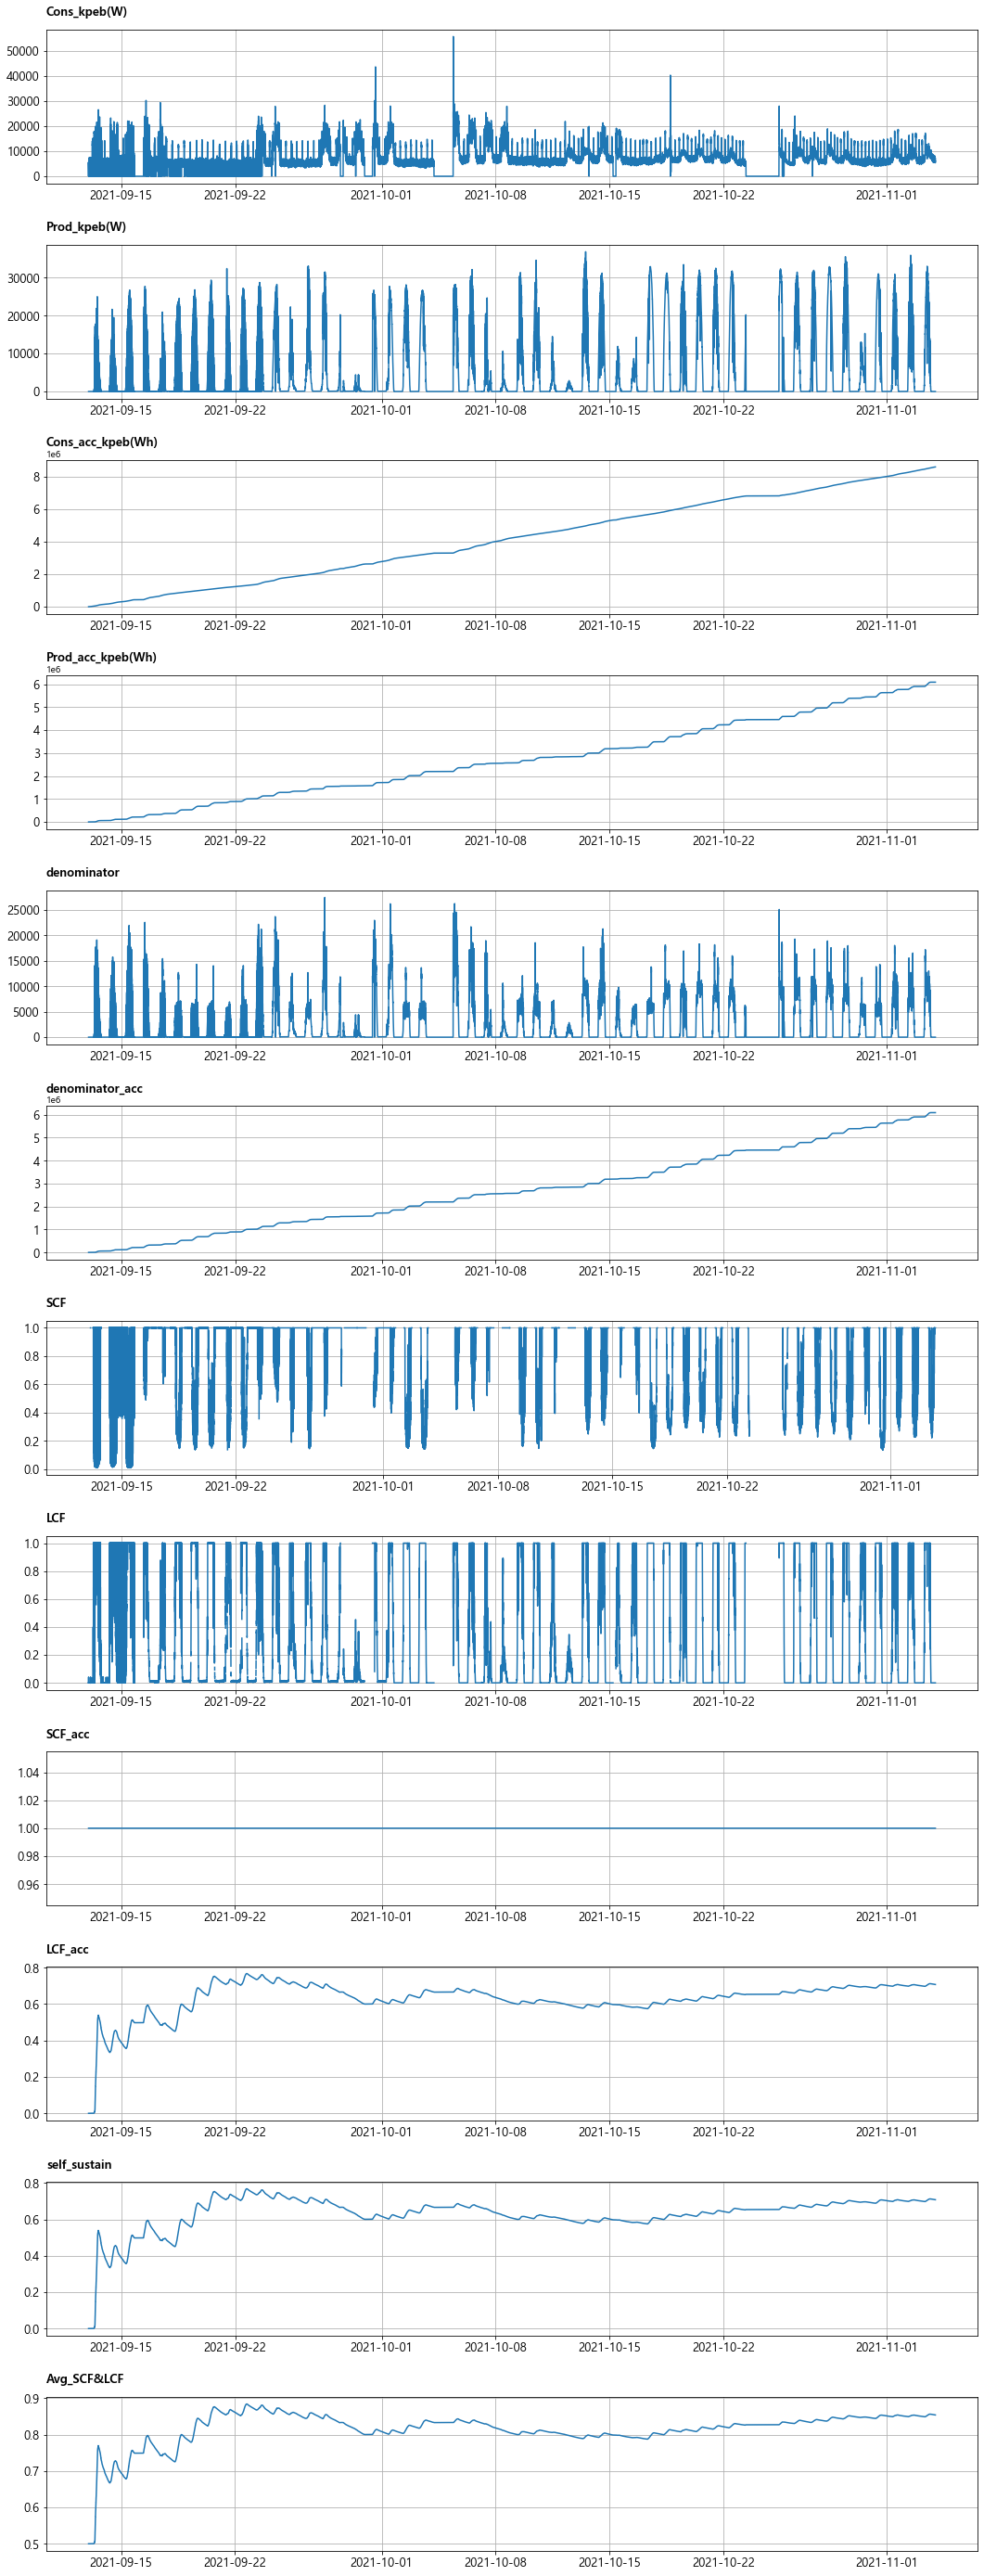

In [350]:
fig, ax = plt.subplots(figsize=(18,50))

for i in range(len(df_kpeb.columns)):
    plt.subplot(len(df_kpeb.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.4)
    name = df_kpeb.columns[i]
    plt.plot(df_kpeb[name])    
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)                
#     plt.xlim(pd.Timestamp('2020-11-01'), pd.Timestamp('2021-08-31'))    
    plt.grid(True)
plt.show()
fig.tight_layout()